<a href="https://colab.research.google.com/github/ssandeep630241/image-classification-for-food/blob/main/Mini_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional


In [3]:
# prompt: import Mobilenetv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2



In [4]:
import os
import tensorflow as tf

data_dir = '/content/drive/MyDrive/PR3 dataset/train'
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
image_data = image_generator.flow_from_directory(data_dir, target_size=(224, 224), batch_size=32)


Found 697 images belonging to 9 classes.


In [5]:
# prompt: display names class
print(image_data.class_indices)


{'Actinic keratosis': 0, 'Atopic Dermatitis': 1, 'Benign keratosis': 2, 'Dermatofibroma': 3, 'Melanocytic nevus': 4, 'Melanoma': 5, 'Squamous cell carcinoma': 6, 'Tinea Ringworm Candidiasis': 7, 'Vascular lesion': 8}


In [6]:
# prompt: print in order wise
class_indices = image_data.class_indices
class_names = sorted(class_indices, key=class_indices.get)
for class_name in class_names:
  print(class_name)

Actinic keratosis
Atopic Dermatitis
Benign keratosis
Dermatofibroma
Melanocytic nevus
Melanoma
Squamous cell carcinoma
Tinea Ringworm Candidiasis
Vascular lesion


In [7]:
train_data=image_data
print(train_data.class_indices)

{'Actinic keratosis': 0, 'Atopic Dermatitis': 1, 'Benign keratosis': 2, 'Dermatofibroma': 3, 'Melanocytic nevus': 4, 'Melanoma': 5, 'Squamous cell carcinoma': 6, 'Tinea Ringworm Candidiasis': 7, 'Vascular lesion': 8}


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Flatten, GlobalAveragePooling2D, Reshape
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer


# Get the image dimensions from the ImageDataGenerator
input_shape = image_data.image_shape

model = Sequential()
model.add(Flatten(input_shape=input_shape)) # Flatten the image data to 2D
# Reshape to add a temporal dimension for LSTM
# Assuming you want to treat each pixel in the flattened image as a timestep
model.add(Reshape((-1, 1)))
model.add(LSTM(units=128, return_sequences=False)) # Set return_sequences to False
model.add(Dropout(0.2))
# Add a Dense layer for classification
num_classes = len(image_data.class_indices)  # Get the number of classes
model.add(Dense(num_classes, activation='softmax')) # Output layer for classification

 # Use the imported Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 reshape (Reshape)           (None, 150528, 1)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 9)                 1161      
                                                                 
Total params: 67721 (264.54 KB)
Trainable params: 67721 (264.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
model.fit(train_data, epochs=12)

NameError: name 'model' is not defined

In [1]:
loss, accuracy = model.evaluate(train_data)
print(f"Accuracy: {accuracy * 100:.2f}%")

NameError: name 'model' is not defined

In [ ]:
model.save('my_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: build mobilenet v2 model

base_model = MobileNetV2(input_shape=input_shape, include_top=False)
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_names), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               8028288   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 10287433 (39.24 MB)
Trainable params: 8029449 (30.63 MB)
Non-trainable params: 2257984 (8.61 MB)
_________

In [ ]:
model.fit(train_data, epochs=10)
loss, accuracy = model.evaluate(train_data)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
22/22 [==============================] - 10s 316ms/step - loss: 1.4902 - accuracy: 0.4806
Epoch 2/10
22/22 [==============================] - 7s 312ms/step - loss: 0.8715 - accuracy: 0.7016
Epoch 3/10
22/22 [==============================] - 7s 295ms/step - loss: 0.7018 - accuracy: 0.7403
Epoch 4/10
22/22 [==============================] - 7s 331ms/step - loss: 0.5471 - accuracy: 0.8250
Epoch 5/10
22/22 [==============================] - 7s 312ms/step - loss: 0.4419 - accuracy: 0.8436
Epoch 6/10
22/22 [==============================] - 7s 297ms/step - loss: 0.3794 - accuracy: 0.8752
Epoch 7/10
22/22 [==============================] - 7s 336ms/step - loss: 0.3172 - accuracy: 0.9053
Epoch 8/10
22/22 [==============================] - 7s 332ms/step - loss: 0.2709 - accuracy: 0.9240
Epoch 9/10
22/22 [==============================] - 6s 292ms/step - loss: 0.2418 - accuracy: 0.9283
Epoch 10/10
22/22 [==============================] - 8s 337ms/step - loss: 0.1448 - accuracy: 0.981

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Flatten, GlobalAveragePooling2D, Reshape
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Get the image dimensions from the ImageDataGenerator
input_shape = image_data.image_shape

# Build MobileNetV2 model
base_model = MobileNetV2(input_shape=input_shape, include_top=False)
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D()) # Use GlobalAveragePooling2D instead of Flatten + Reshape
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_names), activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 128)               163968    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 2423113 (9.24 MB)
Trainable params: 1651

In [ ]:
model.fit(train_data, epochs=10)
loss, accuracy = model.evaluate(train_data)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
22/22 [==============================] - 6s 285ms/step - loss: 0.1788 - accuracy: 0.9627
Epoch 2/10
22/22 [==============================] - 7s 336ms/step - loss: 0.1740 - accuracy: 0.9598
Epoch 3/10
22/22 [==============================] - 7s 299ms/step - loss: 0.1570 - accuracy: 0.9541
Epoch 4/10
22/22 [==============================] - 7s 296ms/step - loss: 0.1398 - accuracy: 0.9598
Epoch 5/10
22/22 [==============================] - 7s 334ms/step - loss: 0.1271 - accuracy: 0.9713
Epoch 6/10
22/22 [==============================] - 6s 289ms/step - loss: 0.0973 - accuracy: 0.9885
Epoch 7/10
22/22 [==============================] - 6s 288ms/step - loss: 0.0923 - accuracy: 0.9871
Epoch 8/10
22/22 [==============================] - 7s 329ms/step - loss: 0.0782 - accuracy: 0.9842
Epoch 9/10
22/22 [==============================] - 7s 305ms/step - loss: 0.0708 - accuracy: 0.9928
Epoch 10/10
22/22 [==============================] - 6s 285ms/step - loss: 0.0378 - accuracy: 1.0000

In [ ]:
model.save('my_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: to upload image to predict disease

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('/content/my_model.hdf5')

# Load the image you want to predict
image_path = '/content/drive/MyDrive/PR3 dataset/train/Actinic keratosis/ISIC_0024468.jpg'

# Preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0

# Add a batch dimension
img_array = tf.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Ensure the class_names list matches the model's output
# Replace with the actual class names your model is trained on
class_names = ['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']
# Check if predicted index is within bounds
if predicted_class_index < len(class_names):
    predicted_class_name = class_names[predicted_class_index]
    print(predicted_class_name)
else:
    print("Predicted class index out of range. Check your model and class names.")

1/1 [==============================] - 1s 1s/step
class_1


In [ ]:
# prompt: print name of class

import numpy as np
# Load the trained model
model = tf.keras.models.load_model('/content/my_model.hdf5')

# Load the image you want to predict
image_path = '/content/drive/MyDrive/PR3 dataset/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-107.jpg'

# Preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0

# Add a batch dimension
img_array = tf.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Ensure the class_names list matches the model's output
# Replace with the actual class names your model is trained on
class_names = ['Actinic keratosis', 'Basal cell carcinoma', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Vascular lesion', 'Squamous cell carcinoma']

# Check if predicted index is within bounds
if predicted_class_index < len(class_names):
    predicted_class_name = class_names[predicted_class_index]
    print(predicted_class_name)
else:
    print("Predicted class index out of range. Check your model and class names.")


1/1 [==============================] - 1s 753ms/step
Melanocytic nevus


In [ ]:
from google.colab import files
files.download('/content/mymodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

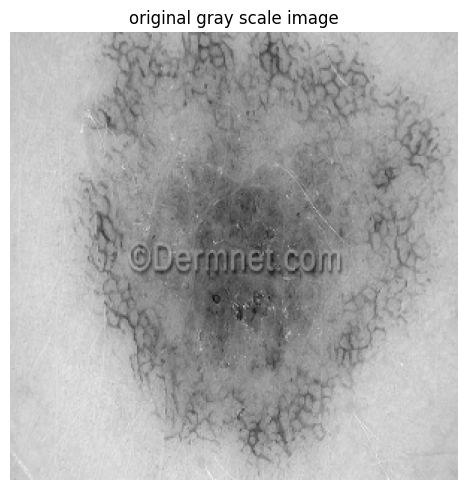

In [ ]:
simport numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product
plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')
kernel=tf.constant([[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1],])
image=tf.io.read_file('/content/drive/MyDrive/PR3 dataset/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-107.jpg')
image=tf.io.decode_jpeg(image,channels=1)
image=tf.image.resize(image,size=[300,300])
img=tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.title("original gray scale image")
plt.show()